In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from citipy import citipy
import time
from datetime import datetime
from config import weather_api_key
import numpy as np

In [2]:
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
langs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_langs = zip(lats, langs)
lat_langs
coordinates = list(lat_langs)


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aaa597a767874d77f0efd27ade713a44'

In [4]:
clean_cities =[]
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    if city not in clean_cities:
        clean_cities.append(city)


In [5]:
# create an empty list to hold the weather data
city_data = []
# Print the begining of the logging
print("Begining Data Retrieval     ")
print("____________________________")

#create counters
record_count = 1
set_count = 1

for i, city in enumerate(clean_cities):
    #group cities
    if (i % 50 == 0 and i >=50):
        set_count +=1
        record_count +=1
        time.sleep(60)
    #create and endpoint URL
    city_url = url +"&q="+ city.replace(" ","+")
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count+=1
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        current_description = city_weather["weather"][0]["description"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date,
                          "Current Description": current_description})

# If an error is experienced, skip the city.
    except Exception as e:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Begining Data Retrieval     
____________________________
Processing Record 1 of Set 1 | sur
Processing Record 2 of Set 1 | tasiilaq
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | esso
Processing Record 5 of Set 1 | ngukurr
City not found. Skipping...
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | hasaki
Processing Record 8 of Set 1 | kirkwood
Processing Record 9 of Set 1 | mastic beach
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | nikolskoye
Processing Record 12 of Set 1 | chipinge
Processing Record 13 of Set 1 | mar del plata
Processing Record 14 of Set 1 | saint george
Processing Record 15 of Set 1 | vardo
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | chhatarpur
Processing Record 18 of Set 1 | one hundred mile house
City not found. Skipping...
Processing Record 19 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | ca

Processing Record 183 of Set 4 | tuatapere
Processing Record 184 of Set 4 | constantine
Processing Record 185 of Set 4 | hanzhong
Processing Record 186 of Set 4 | grindavik
Processing Record 187 of Set 4 | trairi
Processing Record 188 of Set 4 | tlahualilo
City not found. Skipping...
Processing Record 189 of Set 4 | ulaangom
Processing Record 190 of Set 4 | victoria
Processing Record 191 of Set 4 | ust-kulom
Processing Record 192 of Set 4 | itarema
Processing Record 193 of Set 4 | mikhaylovka
Processing Record 194 of Set 4 | elat
Processing Record 195 of Set 4 | qaqortoq
Processing Record 196 of Set 4 | barcelona
Processing Record 197 of Set 4 | hermanus
Processing Record 198 of Set 4 | gwadar
Processing Record 199 of Set 4 | ilulissat
Processing Record 200 of Set 4 | nanakuli
Processing Record 201 of Set 4 | el balyana
City not found. Skipping...
Processing Record 202 of Set 4 | jacareacanga
Processing Record 203 of Set 4 | burnie
Processing Record 205 of Set 5 | karratha
Processing R

Processing Record 372 of Set 8 | kupang
Processing Record 373 of Set 8 | mayya
Processing Record 374 of Set 8 | vestmanna
Processing Record 375 of Set 8 | garoua
Processing Record 376 of Set 8 | muravlenko
Processing Record 377 of Set 8 | ust-nera
Processing Record 378 of Set 8 | maniitsoq
Processing Record 379 of Set 8 | cooma
Processing Record 380 of Set 8 | tabora
Processing Record 381 of Set 8 | la ronge
Processing Record 382 of Set 8 | guerrero negro
Processing Record 383 of Set 8 | hay river
Processing Record 384 of Set 8 | san luis
Processing Record 385 of Set 8 | hithadhoo
Processing Record 386 of Set 8 | coihaique
Processing Record 387 of Set 8 | oud-heverlee
Processing Record 388 of Set 8 | shenjiamen
Processing Record 389 of Set 8 | port-gentil
Processing Record 390 of Set 8 | marcona
City not found. Skipping...
Processing Record 391 of Set 8 | nong chik
Processing Record 392 of Set 8 | muli
Processing Record 393 of Set 8 | muros
Processing Record 394 of Set 8 | porto novo
P

Processing Record 560 of Set 11 | mlonggo
Processing Record 562 of Set 12 | novozavedennoye
Processing Record 563 of Set 12 | bima
Processing Record 564 of Set 12 | brae
Processing Record 565 of Set 12 | green river
Processing Record 566 of Set 12 | shizunai
Processing Record 567 of Set 12 | san policarpo
Processing Record 568 of Set 12 | belyy yar
Processing Record 569 of Set 12 | bouna
Processing Record 570 of Set 12 | soc trang
Processing Record 571 of Set 12 | svetlaya
Processing Record 572 of Set 12 | kurilsk
Processing Record 573 of Set 12 | fukue
Processing Record 574 of Set 12 | bacolod
Processing Record 575 of Set 12 | crab hill
City not found. Skipping...
Processing Record 576 of Set 12 | hihifo
City not found. Skipping...
Processing Record 577 of Set 12 | erenhot
Processing Record 578 of Set 12 | tilichiki
Processing Record 579 of Set 12 | sainte-adele
Processing Record 580 of Set 12 | newport
Processing Record 581 of Set 12 | lavrentiya
Processing Record 582 of Set 12 | kak

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

NameError: name 'pd' is not defined

In [5]:
new_column = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed","Current Description"]

In [6]:
city_data_df=city_data_df[new_column]
city_data_df

NameError: name 'city_data_df' is not defined

In [33]:
save_data_tocsv = "Weather_Database/WeatherPy_Database.csv"
#export data to CSV
city_data_df.to_csv(save_data_tocsv,index_label="City_ID")
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
0,Sur,OM,2021-12-05 19:29:53,22.5667,59.5289,74.17,69,0,6.55,clear sky
1,Tasiilaq,GL,2021-12-05 19:28:53,65.6145,-37.6368,30.27,83,97,35.50,light snow
2,Hilo,US,2021-12-05 19:30:43,19.7297,-155.0900,77.29,96,90,4.61,moderate rain
3,Esso,RU,2021-12-05 19:33:02,55.9333,158.7000,2.05,89,79,6.93,broken clouds
4,Cape Town,ZA,2021-12-05 19:29:01,-33.9258,18.4232,63.12,90,90,3.00,light intensity drizzle
...,...,...,...,...,...,...,...,...,...,...
544,Southern Pines,US,2021-12-05 19:49:02,35.1740,-79.3923,64.69,62,90,10.36,overcast clouds
545,Talara,PE,2021-12-05 19:47:24,-4.5772,-81.2719,75.96,64,0,17.27,clear sky
546,Nantucket,US,2021-12-05 19:49:02,41.2835,-70.0995,46.74,51,84,4.79,broken clouds
547,Touros,BR,2021-12-05 19:47:26,-5.1989,-35.4608,86.90,75,83,15.99,broken clouds


In [34]:
#Extract field for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
Current_Description = city_data_df["Current Description"]


In [35]:
import time
today = time.strftime("%x")
today

'12/05/21'

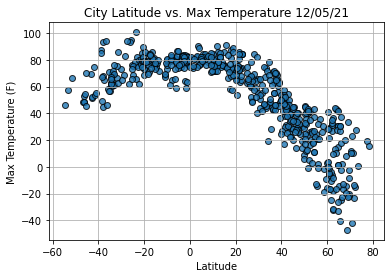

<Figure size 432x288 with 0 Axes>

In [36]:
import time
plt.scatter(lats,
            max_temps,
            edgecolor="black",linewidths=1,marker="o",alpha=0.8,label="Cities")
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()
plt.savefig("weather_data/Fig1.png")

Text(0, 0.5, 'Latitude')

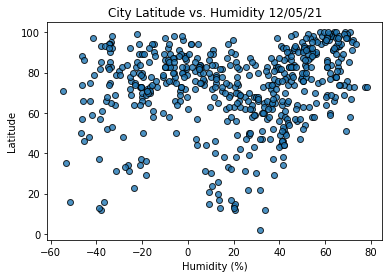

In [37]:
plt.scatter(lats,
            humidity,
            edgecolors="black",linewidths=1,alpha=0.8,marker = "o",label = "Cities")
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
           


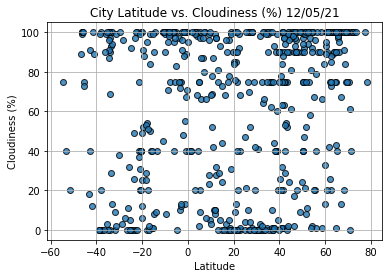

In [38]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

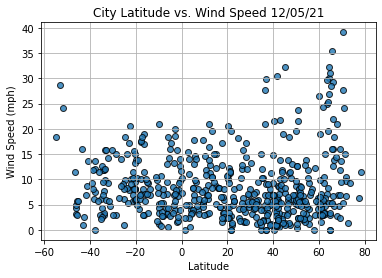

In [39]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [40]:
from scipy.stats import linregress

In [2]:
#create function to perform linear regression on the weather data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
     # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [3]:
index13 = city_data_df.loc[13]
index13

NameError: name 'city_data_df' is not defined

In [1]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df


NameError: name 'city_data_df' is not defined

In [20]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Cape Town,ZA,2021-12-05 19:29:01,-33.9258,18.4232,63.12,90,90,3.00
10,Chipinge,ZW,2021-12-05 19:33:04,-20.1883,32.6236,68.54,80,49,9.44
11,Mar Del Plata,AR,2021-12-05 19:24:24,-38.0023,-57.5575,68.02,85,20,11.99
16,Port Alfred,ZA,2021-12-05 19:25:01,-33.5906,26.8910,69.40,95,100,9.84
19,Kruisfontein,ZA,2021-12-05 19:32:41,-34.0033,24.7314,67.89,85,97,7.63
...,...,...,...,...,...,...,...,...,...
518,Sao Joao Do Piaui,BR,2021-12-05 19:47:49,-8.3581,-42.2467,83.93,58,100,2.75
520,Ambon,ID,2021-12-05 19:47:50,-3.6954,128.1814,77.14,88,75,3.44
523,Nyakahanga,TZ,2021-12-05 19:47:52,-1.6033,31.1414,59.32,78,88,2.64
545,Talara,PE,2021-12-05 19:47:24,-4.5772,-81.2719,75.96,64,0,17.27


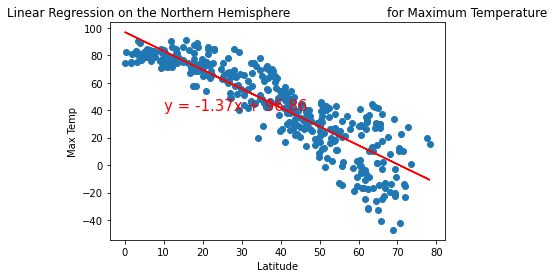

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

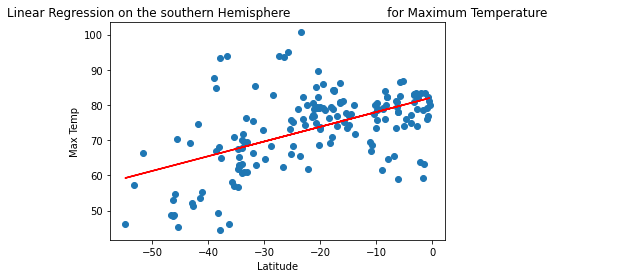

In [22]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


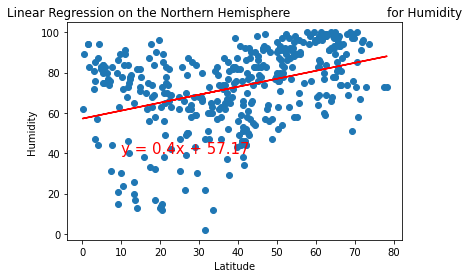

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Humidity', 'Humidity',(10,40))


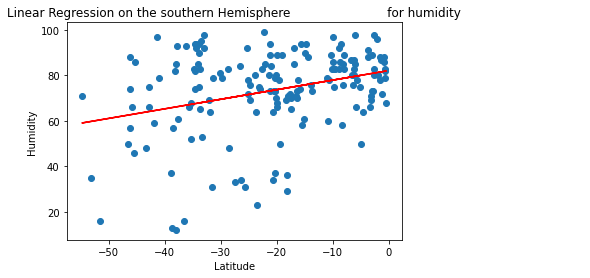

In [24]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the southern Hemisphere \
                        for humidity', 'Humidity',(10,40))


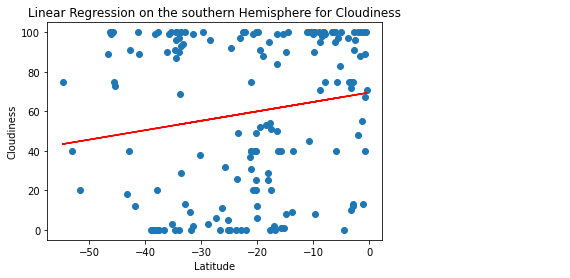

In [25]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the southern Hemisphere for Cloudiness', 'Cloudiness',(10,40))


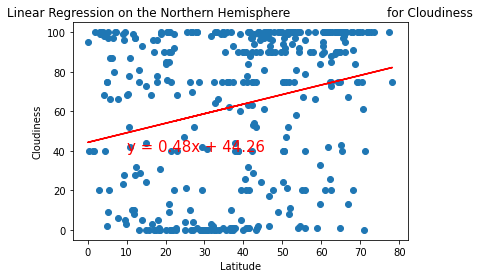

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness',(10,40))

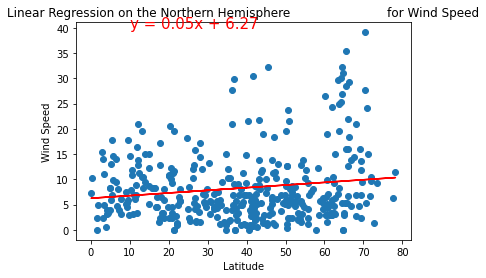

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,40))

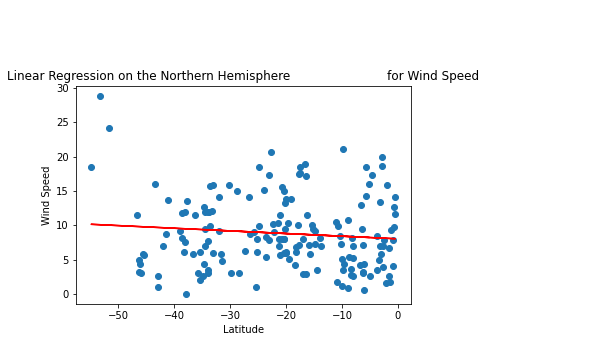

In [28]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,40))

In [29]:
import gmaps